## Baseball Case Study

#### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

###### Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

###### Output: 
Number of predicted wins (W)

#### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv('baseball.csv')

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Checking for the columns

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
# Renaming the columns in understandable words:

df = df.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 
                   'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 
                   'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})

df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# Checking for the shape of the dataset.

df.shape

(30, 17)

There are 30 rows and 17 columns in the dataset including the target variable.

- 'Wins' is the target column.

In [6]:
# Checking for the missing values in the dataset

df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

- From the above observation wa can say that there is no missing values in our dataset.

In [7]:
# Checking for the information of the datset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

- There is no missing values in the datset as said earlier.
- All the columns are of integer datatype except the column 'Earned Run Average'. It is of float datatype.


#### Data Visualization:

1. Runs and Wins

In [8]:
# Getting the relations between the 'Runs' and 'Wins'
df.groupby('Runs')['Wins'].mean()

Runs
573     67.0
613     71.0
622     76.0
626     63.0
640     64.0
644     80.0
647    100.0
650     74.0
655     68.0
656     76.0
661     85.0
667     92.0
669     81.0
683     90.0
689     85.5
694     68.0
696     83.5
697     98.0
703     83.0
713     81.0
720     79.0
724     95.0
729     86.0
737     68.0
748     78.0
751     88.0
764     87.0
891     93.0
Name: Wins, dtype: float64

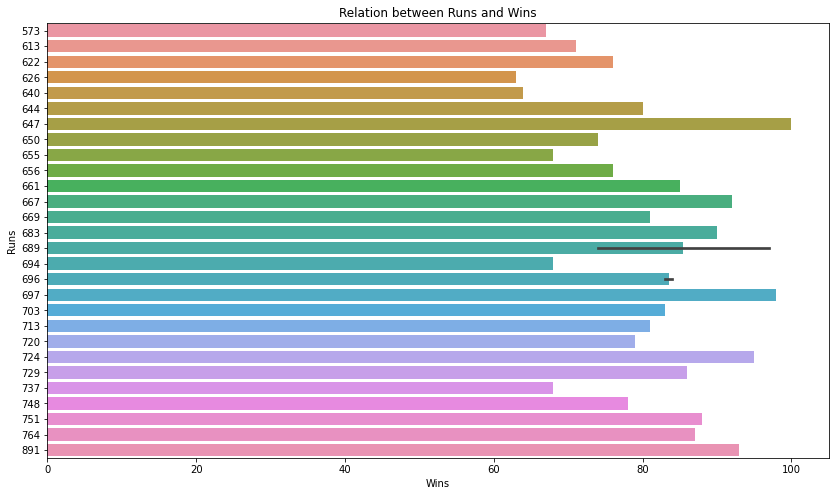

In [9]:
# Plotting graph to see the relation between 'Runs' and 'Wins'
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='Runs', data=df, orient='h')
plt.title('Relation between Runs and Wins')
plt.show()

- The number of wins is highest when the runs is 647.
- The number of wins is lowest when the runs is 626.

2. 'At Bats' and 'Wins'

In [10]:
# Getting the relation between 'At Bats' and 'Wins'
df.groupby('At Bats')['Wins'].mean()

At Bats
5385     92.0
5417     85.0
5420     67.0
5428     83.0
5439     81.0
5457     74.0
5459     86.0
5463     71.0
5467     83.0
5480     68.0
5484    100.0
5485     80.5
5491     97.0
5509     93.0
5511     88.0
5527     90.0
5529     63.0
5533     76.0
5544     76.0
5565     84.0
5567     87.0
5571     64.0
5572     68.0
5575     95.0
5600     68.0
5605     74.0
5631     98.0
5640     78.0
5649     79.0
Name: Wins, dtype: float64

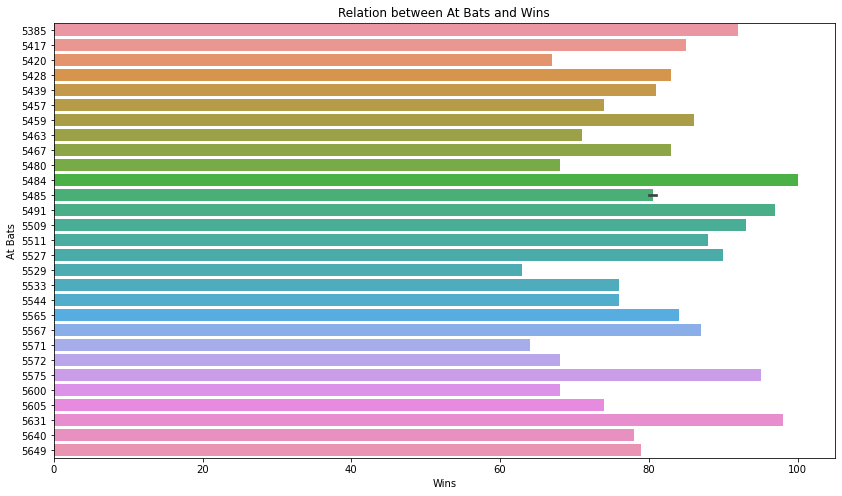

In [11]:
# Plotting graph to see the relation between 'At Bats' and 'Wins'
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='At Bats', data=df, orient='h')
plt.title('Relation between At Bats and Wins')
plt.show()

- The wins is highest when the 'At Bats' is 5484.
- The wins is lowest when the 'At Bats' is 5529.

#### Checking all variables at once:

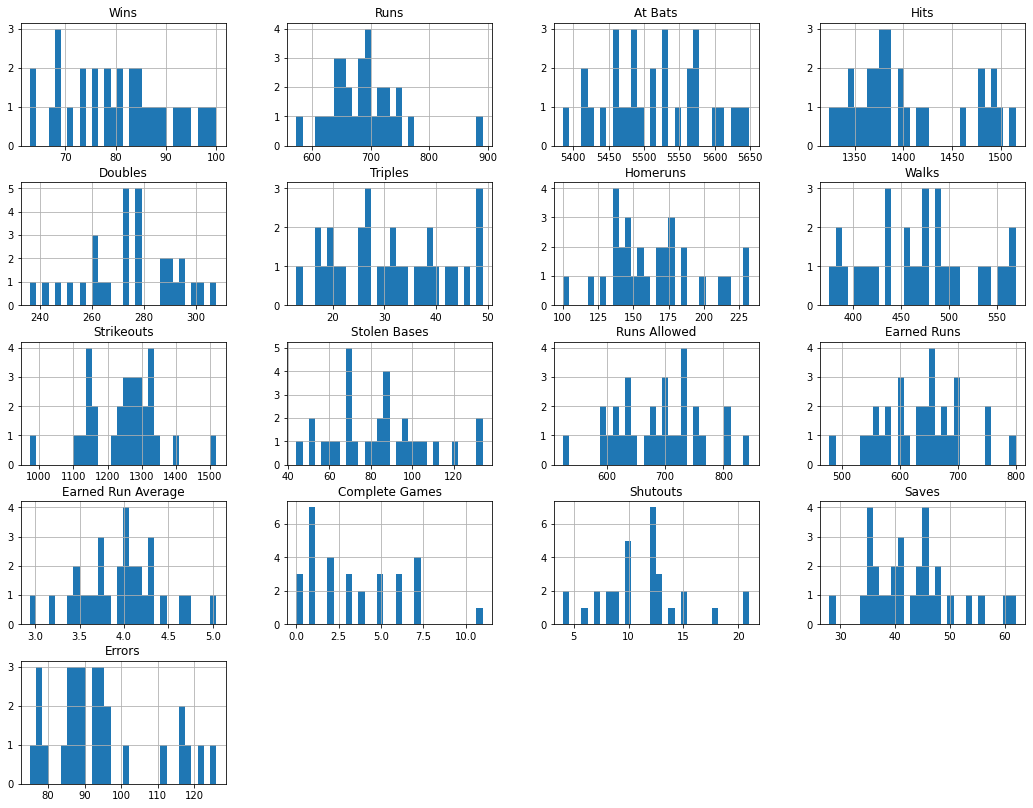

In [12]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,14], bins=30, grid=True)
plt.show()

#### Plotting Pairplot for Bivalent Analysis

<Figure size 1440x1440 with 0 Axes>

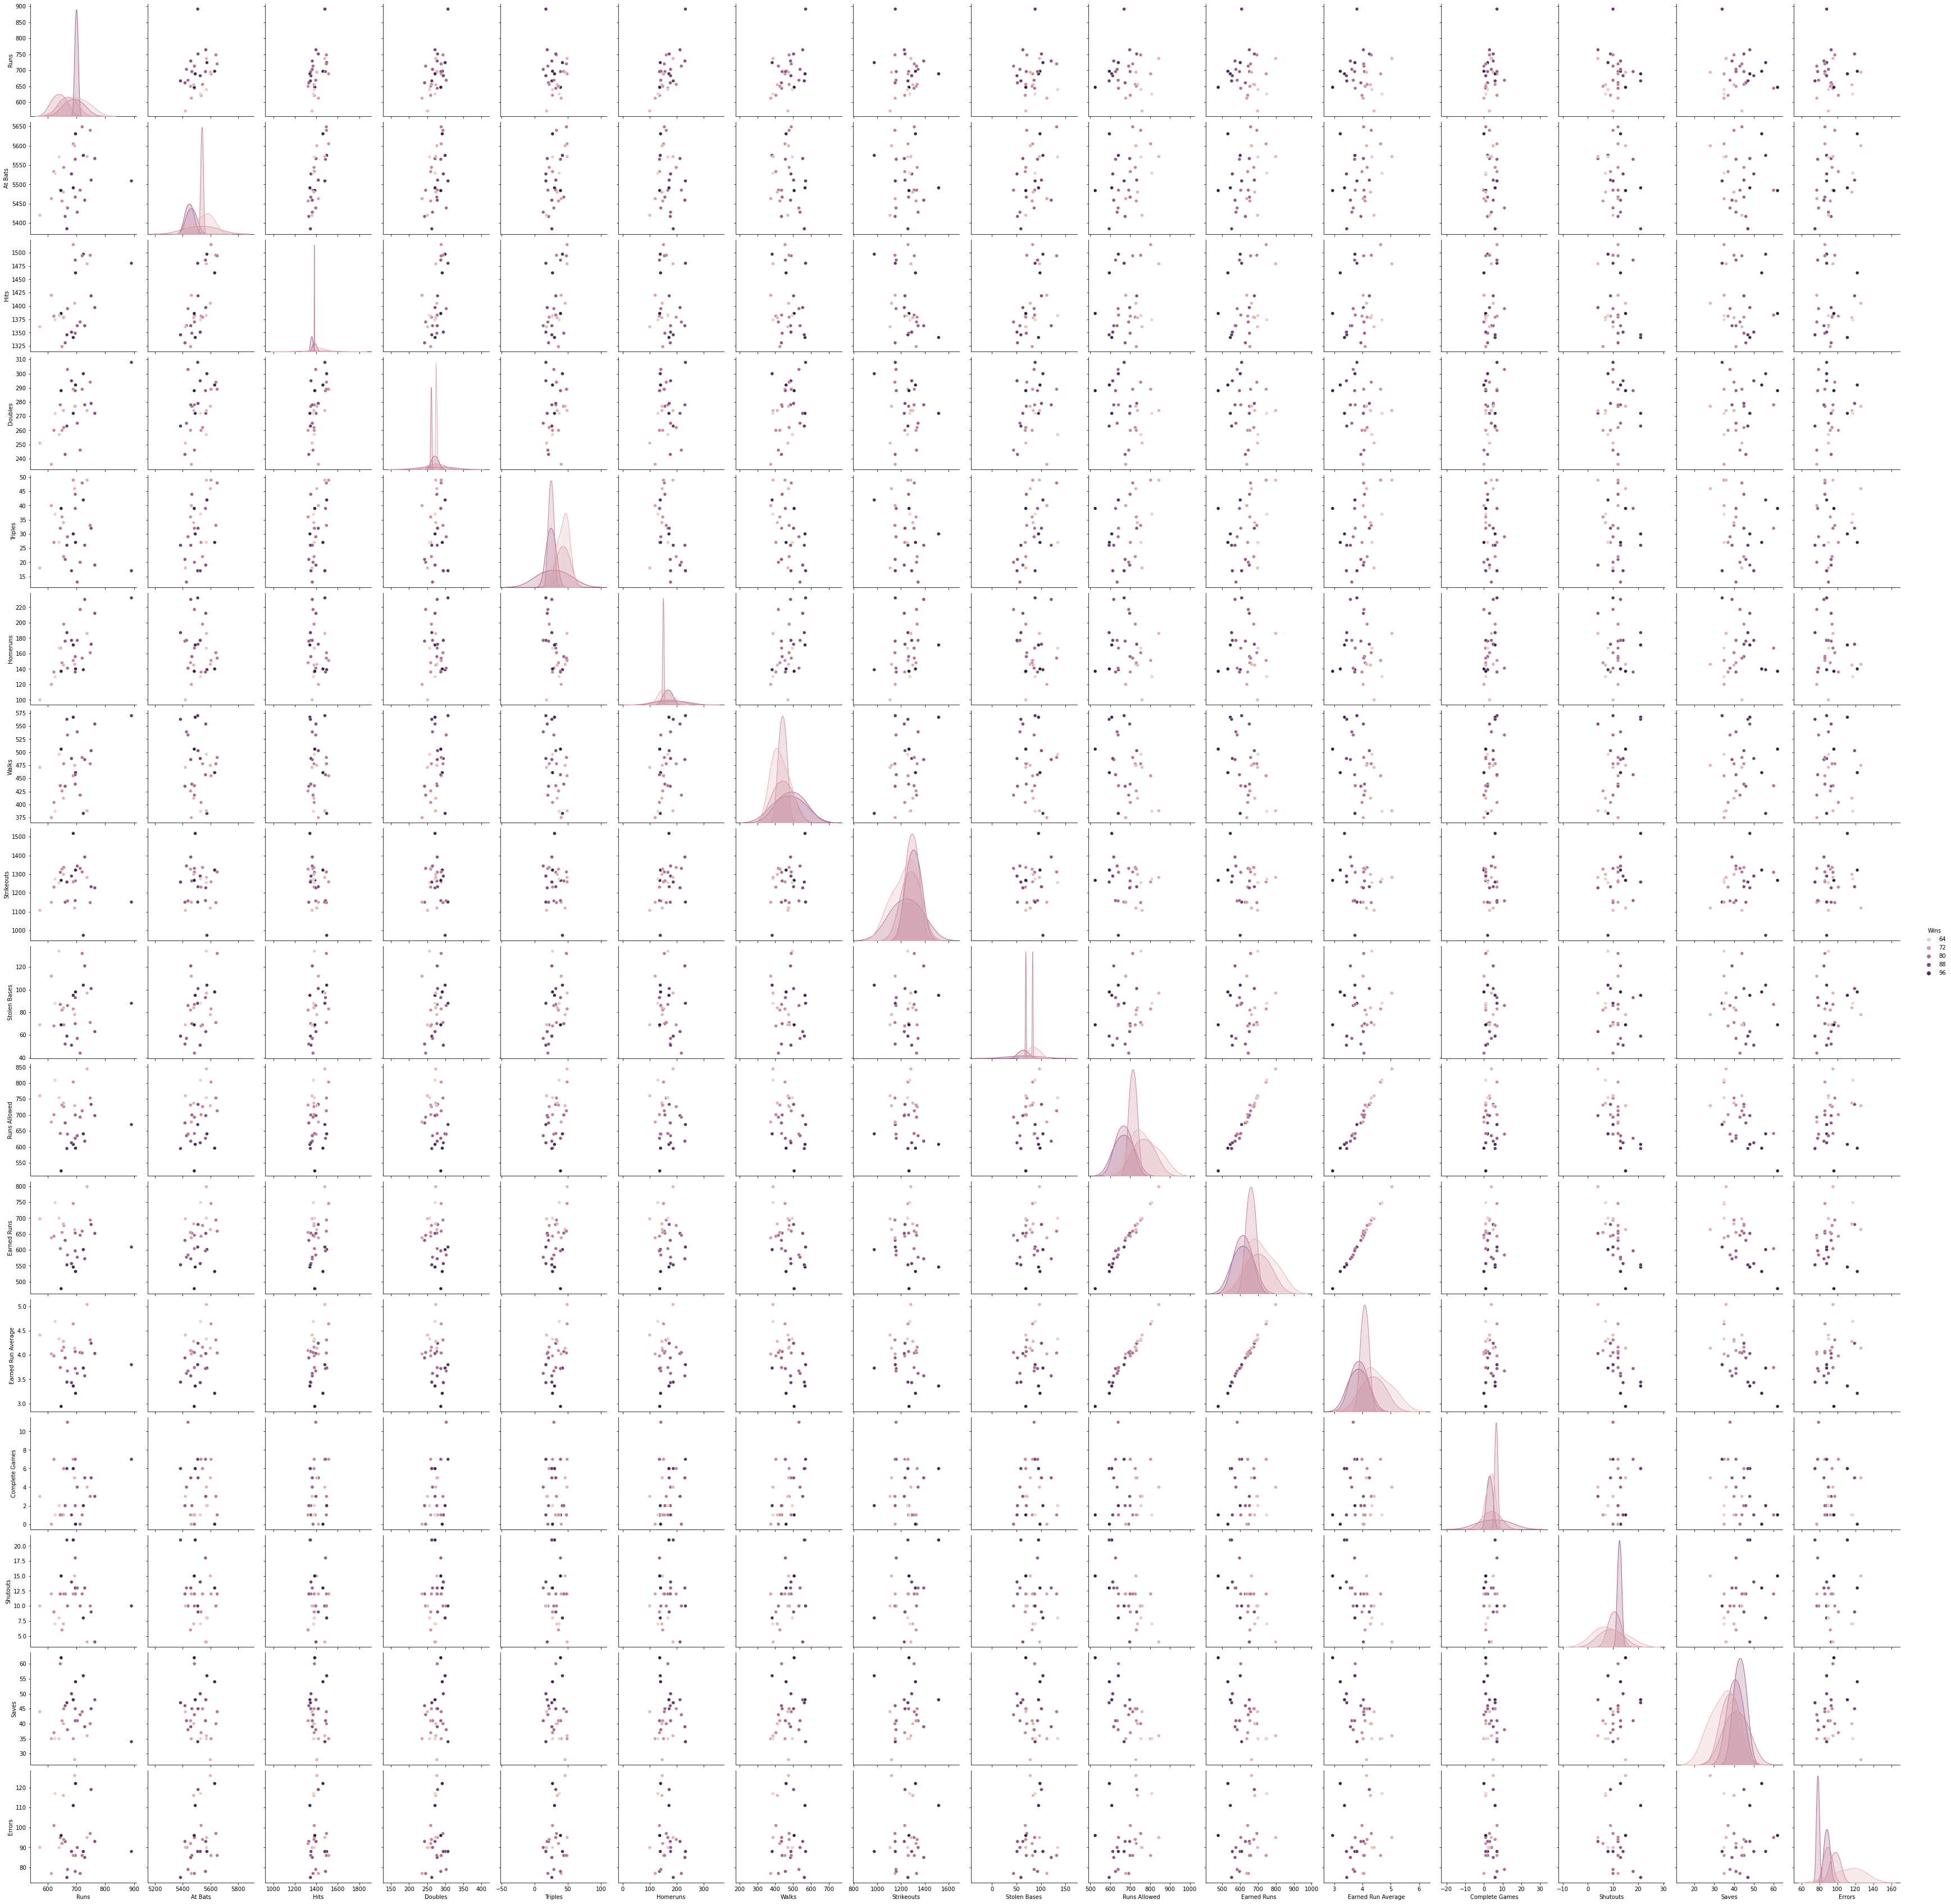

In [13]:
plt.figure(figsize=[20,20])
sns.pairplot(df, hue='Wins', size=3.0)
plt.show()

#### Description:

In [14]:
# Checkinig the description of the dataset using describe() function.

df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


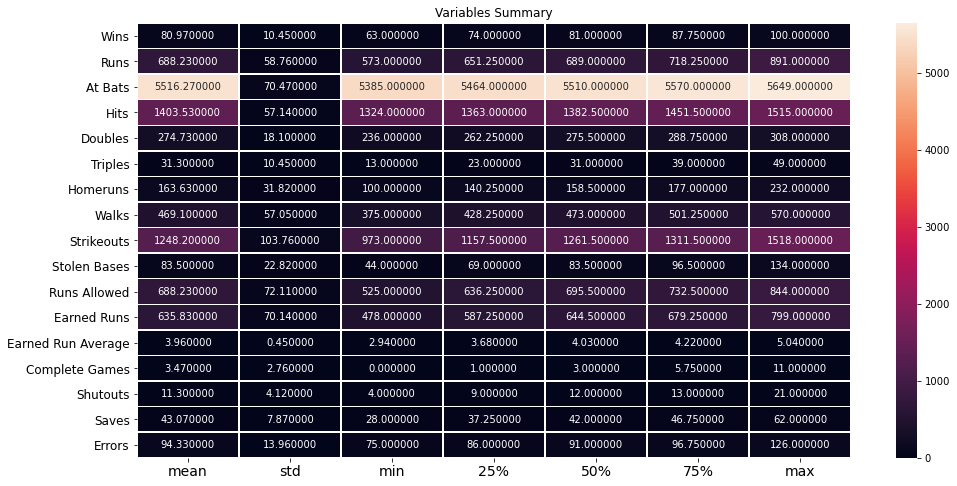

In [15]:
# Plotting Heatmap for describe

plt.figure(figsize=[16,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Variables Summary')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

#### Outcomes of Variable Summary Table:

We're determining the mean, standard deviation, minimum and maximum values of all the columns.

   1. Wins:
        - Mean: 80.97
        - std: 10.45
        - Minimum Value: 63
        - Maximum Value: 100
    
   2. Runs:
       - Mean: 688.23
       - std: 58.76
       - Minimum Value: 573
       - Maximum Value: 891
       
   3. At Bats:
       - Mean: 5516.27
       - std: 70.47
       - Minimum Value: 5385
       - Maximum Value: 5649
       
   4. Hits:
       - Mean: 1403.53
       - std: 57.14
       - Minimum Value: 1324
       - Maximum Value: 1515
       
   5. Doubles:
       - Mean: 274.73
       - std: 18.10
       - Minimum Value: 236
       - Maximum Value: 308
       
   6. Triples:
       - Mean: 31.30
       - std: 10.45
       - Minimum Value: 13
       - Maximum Value: 49
       
   7. Homeruns:
       - Mean: 163.63
       - std: 31.82
       - Minimum Value: 100
       - Maximum Value: 232
       
   8. Walks:
      - Mean: 469.10
      - std: 57.05
      - Minimum Value: 375
      - Maximum Value: 570
      
   9. Strikeouts:
      - Mean: 1248.20
      - 103.76
      - Minimum Value: 973
      - Maximum Value: 1518
   
       

#### Checking for the Correlation of the variables:

In [16]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


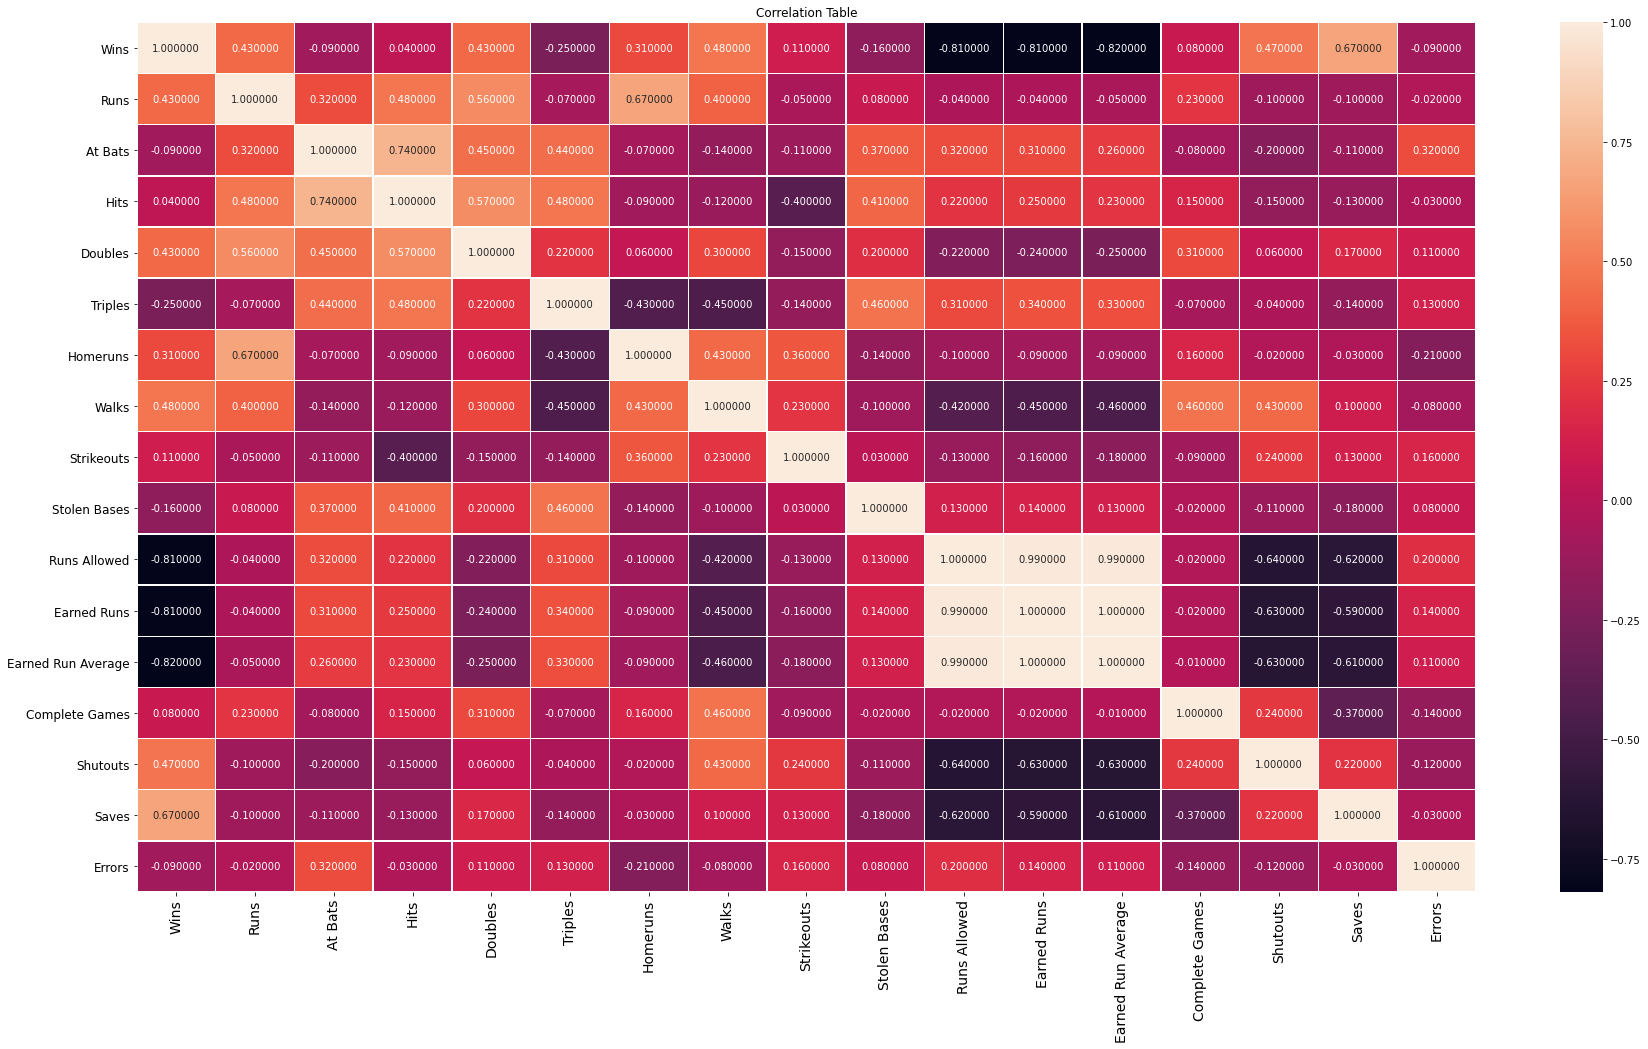

In [17]:
# Plotting Heatmap for correlation

plt.figure(figsize=[30,16])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

#### Outcomes of Correaltion Table:

- 'Saves' column has the highest correlation (67%) with the target column, which can be considered as strong bond.
- 'Walks' column has 48% correlation with the target column, which can be considered as strong bond.
- 'Shutouts' column has 47% correlation with the target column, which can be considerd as strong bond.
- 'Earned Run Average (ERA)' has the lowest correlation -82% with the target column, which can be considered as very weak bond.
- 'Earned Runs' has -81% correlation with the target column which can be considered as very weak bond.
- 'Runs Allowed' has -81% correlation with the target column which can be considered as very weak bond.

#### Outliers Analysis:

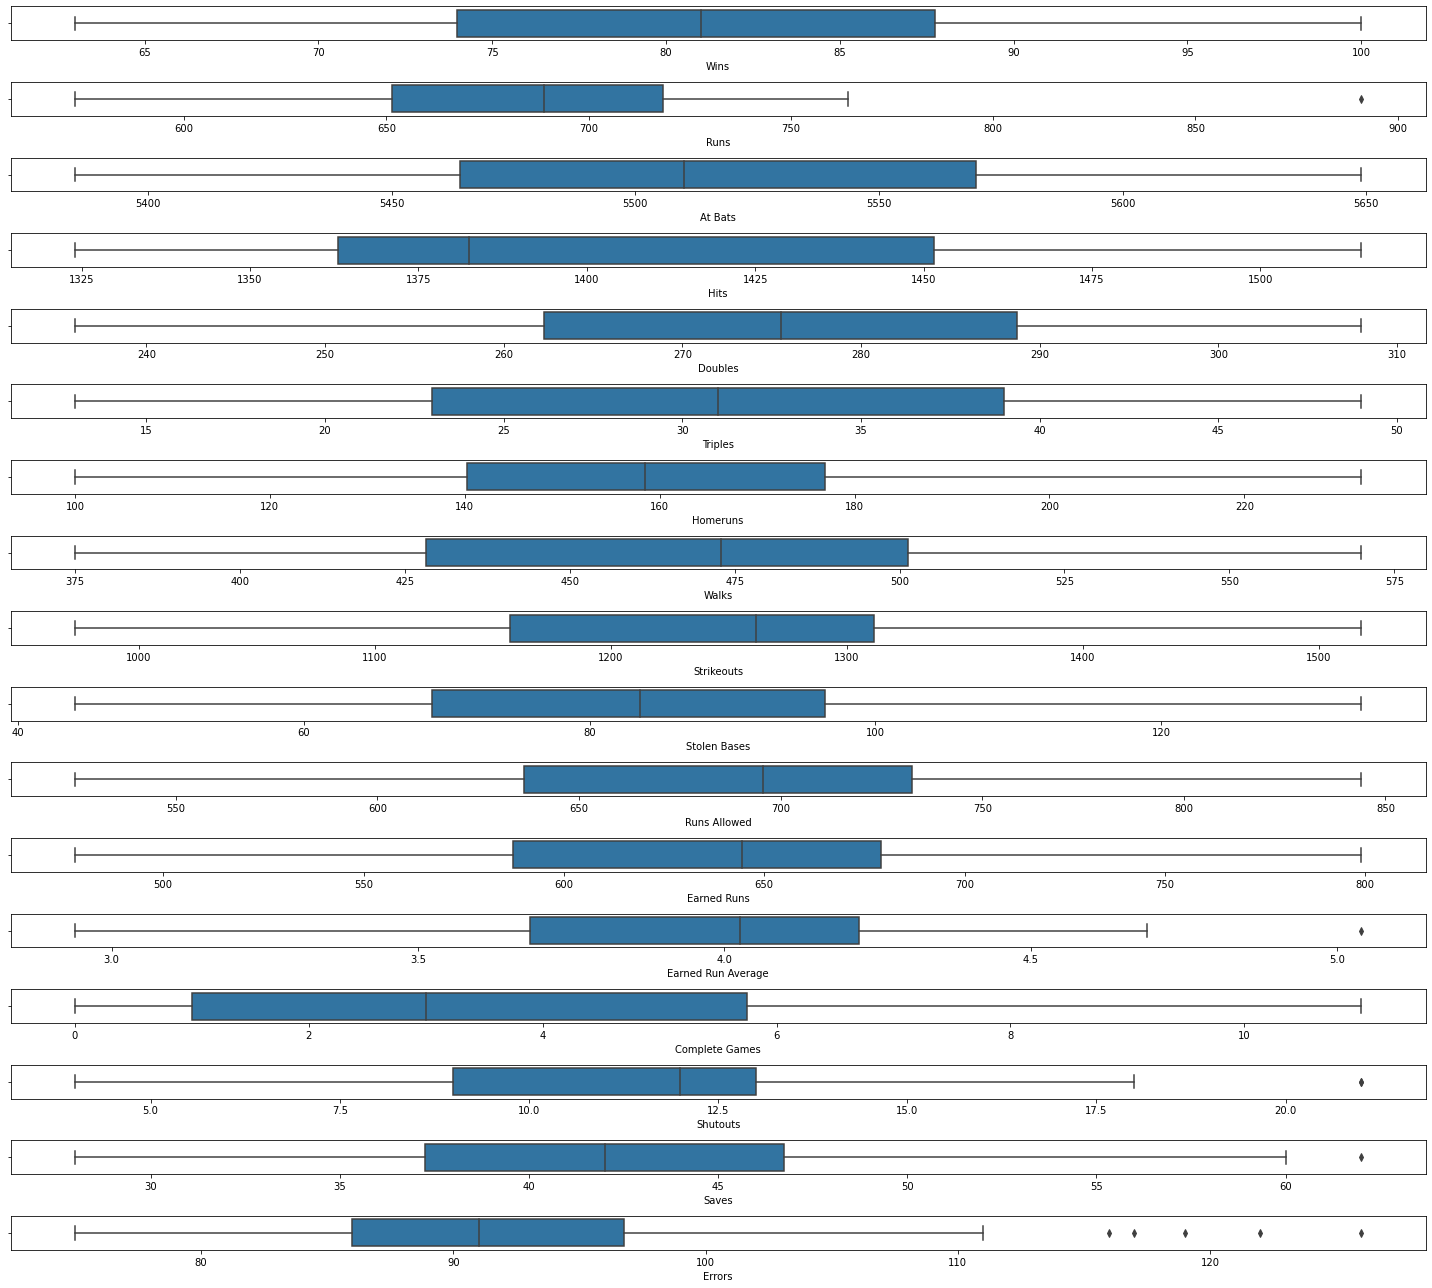

In [18]:
fig, axs = plt.subplots(17, figsize = (20,18))
plt1 = sns.boxplot(df['Wins'], ax = axs[0])
plt2 = sns.boxplot(df['Runs'], ax = axs[1])
plt3 = sns.boxplot(df['At Bats'], ax = axs[2])
plt4 = sns.boxplot(df['Hits'], ax = axs[3])
plt5 = sns.boxplot(df['Doubles'], ax = axs[4])
plt6 = sns.boxplot(df['Triples'], ax = axs[5])
plt7 = sns.boxplot(df['Homeruns'], ax = axs[6])
plt8 = sns.boxplot(df['Walks'], ax = axs[7])
plt9 = sns.boxplot(df['Strikeouts'], ax = axs[8])
plt10 = sns.boxplot(df['Stolen Bases'], ax = axs[9])
plt11 = sns.boxplot(df['Runs Allowed'], ax = axs[10])
plt12 = sns.boxplot(df['Earned Runs'], ax = axs[11])
plt13 = sns.boxplot(df['Earned Run Average'], ax = axs[12])
plt14 = sns.boxplot(df['Complete Games'], ax = axs[13])
plt15 = sns.boxplot(df['Shutouts'], ax = axs[14])
plt16 = sns.boxplot(df['Saves'], ax = axs[15])
plt17 = sns.boxplot(df['Errors'], ax=axs[16])
plt.tight_layout()

As per the boxplot, the dataset contains very few outliers.

- Columns Containing Outliers:
    1. Errors (Maximum outliers are present in this coulmn)
    2. Saves (very few outliers)
    3. Shutouts (Very few outliers)
    4. Earned Run Average (Very few Outliers)
    5. Runs (Very few outliers)
    
- Coulmns doesn't have outliers:
    1. Wins
    2. At Bats
    3. Hits
    4. Doubles
    5. Triples
    6. Homeruns
    7. walks
    8. Strikeouts
    9. Stolen Bases
    10. Runs Allowed
    11. Earned Runs
    12. Complete Games
    
As our dataset have very few outliers, it can be neglected. Let's check for the skewness.

#### Checking the Skewness:

In [19]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

#### Outcome of Skewness:

- The thershold for the skewness is taken as +0.5 to -0.5. The value outside this is considered as skewed.

- Some of the feature column is skewed. They are:
    1. Runs (High)
    2. Hits
    3. Homeruns (Very few)
    4. Complete Games (few)
    5. Shutouts (Very few)
    6. Saves (few)
    7. Errors
    
- Coulmns without skewness are follows:
    1. At Bats
    2. Doubles
    3. Triples
    4. Walks
    5. Strikeouts
    6. Stolen Bases
    7. Runs Allowed
    8. Earned Runs
    9. Earned Run Average


### Data Cleaning:

#### Removing Outliers:

zscore Technique:

In [20]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(30, 17)

In [21]:
thershold = 3
print (np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [22]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


##### Checking percentage of Data lost

In [23]:
loss_per = ((30-29)/30)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.3333333333333335


- Dividing data in features and vector:

In [24]:
x = df_new.drop(['Wins'], axis=1)
y = df_new['Wins']

#### Removing Skewness:

Using power_transform:

In [25]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

#### StandardScaler:

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

#### Data Preprocessing:

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training:

#### LinerRegression:

In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 4.33732257e+00  2.62012634e-14 -1.42108547e-14 -1.67034149e+00
  1.04795831e+00 -4.40106911e-01 -1.88112960e+00 -7.64409044e-01
 -7.51289460e-01  1.98476749e+01 -1.35215749e+01 -1.21022080e+01
  2.19720648e+00  4.59206091e-01  5.49849420e+00 -1.54809197e+00]
Intercept : 80.76334910905743


In [29]:
# Predicting the new result

y_pred = LR.predict(x_test)
y_pred

array([81.30380041, 91.82504827, 78.15605337, 71.18768045, 81.03173282,
       82.63280884])

#### Ridge Regression:

In [30]:
# Importing the library
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(x_train,y_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

Ridge Coefficients : [ 3.85819574  0.          0.         -0.25550884  0.35933903 -0.70075552
 -0.83935722 -0.43314511 -1.06466636  0.68929884 -2.17959564 -4.25547905
  1.07826662  0.53271357  4.02823381 -0.38698588]
Intercept : 80.32478647610012


In [31]:
# Predicting the new result

rid_pred = rid.predict(x_test)

rid_pred

array([74.46118238, 89.4321019 , 76.68077518, 69.63144922, 80.66352493,
       82.5497742 ])

#### RandomForestRegressor:

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [33]:
# Predicting the new result

rf_pred = RF.predict(x_test) 
rf_pred

array([76.47213002, 90.14935453, 77.28456974, 75.94110152, 74.32526169,
       75.96559647])

#### KNeighborsRegressor:

In [34]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [35]:
# Predicting the new result

knn_pred = KNN.predict(x_test)
knn_pred

array([75.5, 84.5, 84. , 80.5, 78.5, 85. ])

#### Root Mean Squared Error

In [36]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 4.835786808651358
Root Mean Squared Error for Ridge Regression is : 4.116492782264325
Root Mean Squared Error for RandomForestRegressor is : 6.987688649023168
Root Mean Squared Error for KNeighborsRegressor is : 8.306623862918075


- The Root Mean Squared Error if lowest for Rige Regression. So, this is the best fit model.

#### R-Squred:

In [37]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y_test, y_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y_test, knn_pred))

R2 Score for LinearRegression is : 0.7572508575218704
R2 Score for Ridge_Regression is : 0.824095022562966
R2 Score for RandomForestRegressor is : 0.49313710045999426
R2 score for KNeighborsRegressor is : 0.2837370242214533


- R2 Score closest to 1.0 is considered as best. From the above observation we can that Ridge_Regression have the closest value i.e. 0.82. So, this is the best model.

- Also Ridge Regression has the lowest Root Mean Squared error (RMSE). So, from both the observations we can say that the best fit model id Ridge Regression.

### Model Saving:

In [38]:
import pickle
filename = 'baseball_case_study.pkl'
pickle.dump(rid, open(filename,'wb'))

### Conclusion:

Checking the diffrence between Predicted and Original Values

In [39]:
a = np.array(y_test)
predicted = np.array(rid.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,74,74.461182
1,97,89.432102
2,76,76.680775
3,67,69.631449
4,78,80.663525
5,88,82.549774


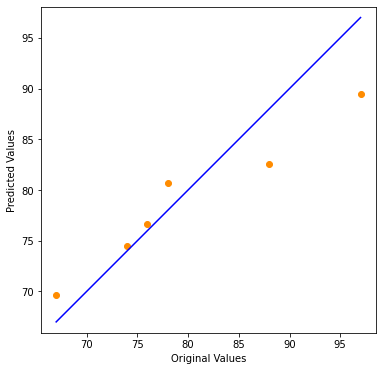

In [40]:
# Plotting graph to show the diffrence between Predicated and Original Values

plt.figure(figsize=(6,6))
plt.scatter(a, predicted, color='darkorange')

p1 = max(max(predicted), max(a))
p2 = min(min(predicted), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Original Values', fontsize=10)
plt.ylabel('Predicted Values', fontsize=10)
plt.axis('equal')
plt.show()